In [122]:
import pandas

# Достаем таблицу
table = pandas.read_csv('cian_parsed.csv')

# Убираем дубликаты
table = table.drop_duplicates()

# Считаем цену за квадратный метр, потому что парсер не спарсил
table['price_per_meter'] = table['price'] / table['total_meters'].astype(int)

# Убираем не нужные нам данные, часть полезных к сожалению тоже
table.drop(['deal_type', 'url', 'author', 'accommodation_type', 'house_number', 'phone', 'heating_type', 'object_type', 'residential_complex'], axis=1, inplace=True)

# Отображаем
table.head(10000)

,author_type,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,house_material_type,finish_type,living_meters,kitchen_meters,district,street,underground,price_per_meter
0,developer,Москва,2,16,1,45.00,23274675.0,2024,Монолитно-кирпичный,Без отделки,"16,4 м²","14,6 м²",Филевский парк,Береговой проезд,Фили,517215.000000
1,real_estate_agent,Москва,9,40,1,41.50,32000000.0,-1,-1,-1,"23,4 м²","4,9 м²",Хорошевский,Ленинградский проспект,ЦСКА,780487.804878
2,real_estate_agent,Москва,11,12,1,33.50,8000000.0,1972,-1,-1,17 м²,7 м²,Чертаново Южное,3-й Дорожный проезд,Улица Академика Янгеля,242424.242424
3,developer,Москва,3,26,1,23.90,22602971.0,2027,Монолитный,"Без отделки, предчистовая, чистовая",-1,-1,Даниловский,NaN,Павелецкая,982737.869565
4,real_estate_agent,Москва,13,41,1,41.50,31000000.0,-1,-1,-1,"23,4 м²","4,9 м²",Хорошевский,Ленинградский проспект,Аэропорт,756097.560976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,developer,Москва,8,8,1,26.48,11784007.0,2025,Монолитно-кирпичный,"Без отделки, чистовая","11,8 м²","5,2 м²",Марьино,NaN,Марьино,453231.038462
476,developer,Москва,3,16,-1,26.50,12099290.0,2025,Монолитно-кирпичный,"Без отделки, чистовая","14,5 м²","4,7 м²",Можайский,NaN,Давыдково,465357.307692
477,realtor,Москва,12,39,1,26.60,12400000.0,2019,-1,-1,15 м²,5 м²,Западное Дегунино,Ильменский проезд,Селигерская,476923.076923
478,developer,Москва,15,29,-1,29.90,12417470.0,2025,Монолитный,"Без отделки, предчистовая, черновая, чистовая","20,5 м²","4,4 м²",Черемушки,Наметкина,Новые Черёмушки,428188.620690


## Зависимость цены квадратного метра в зависимости от параметров

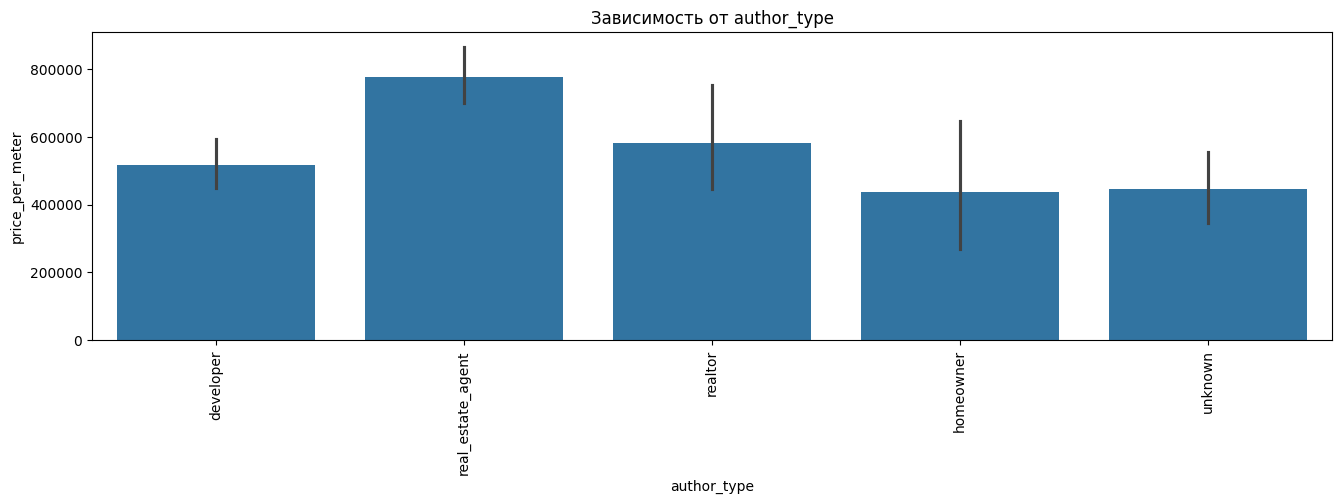

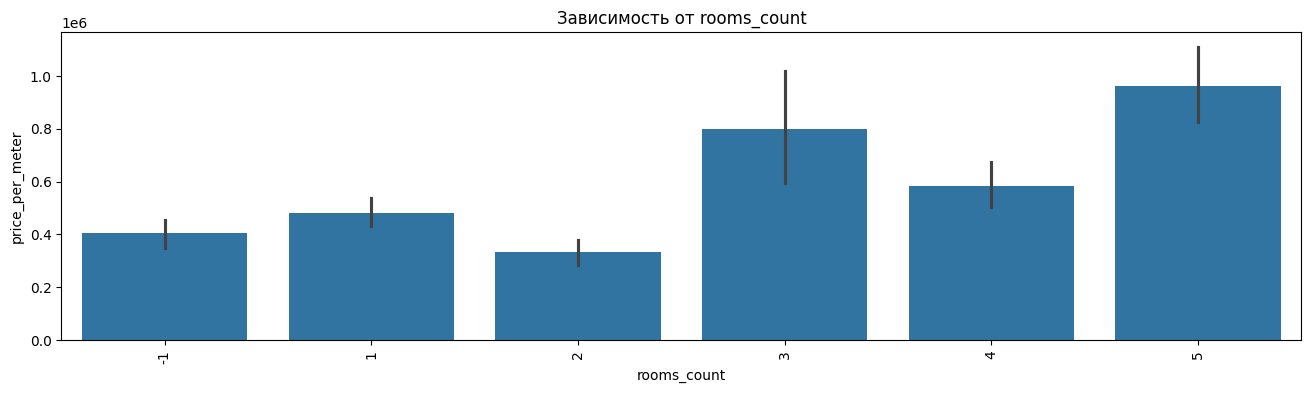

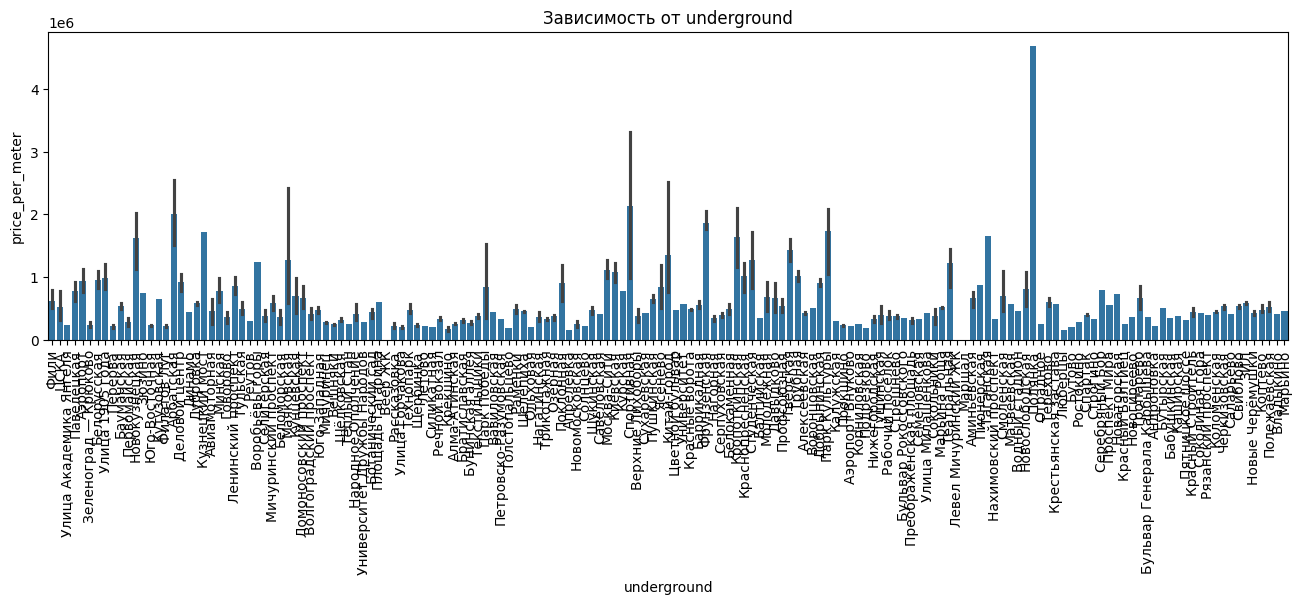

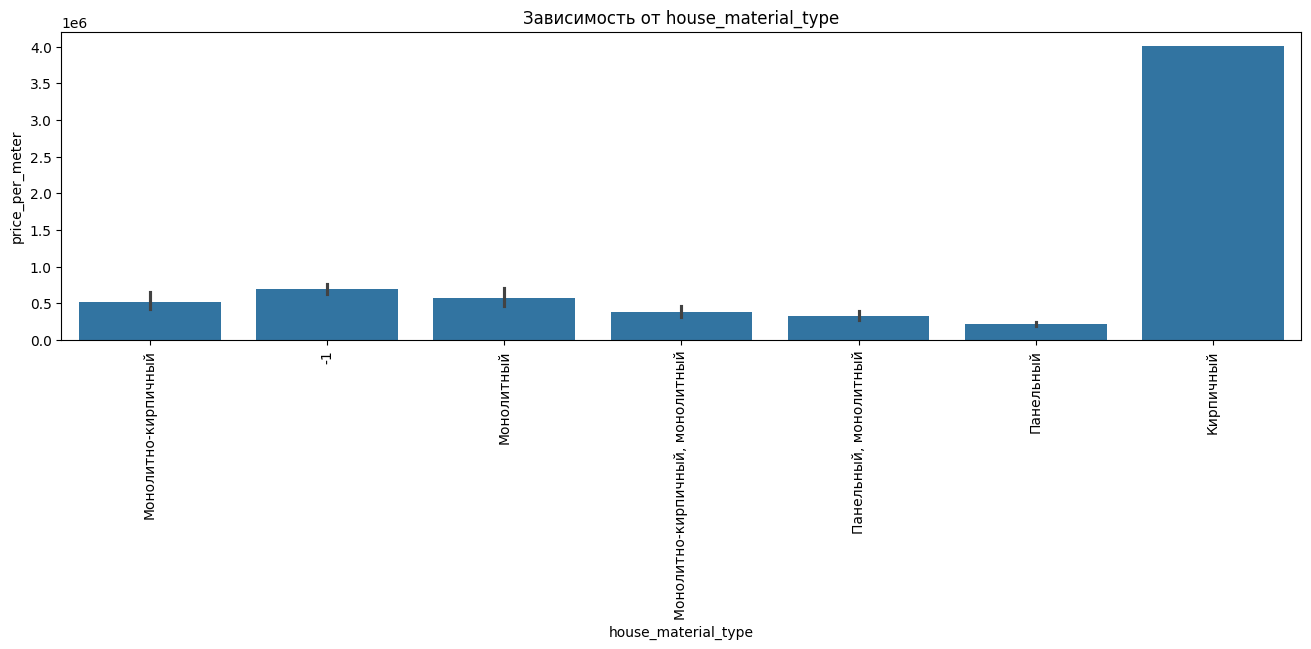

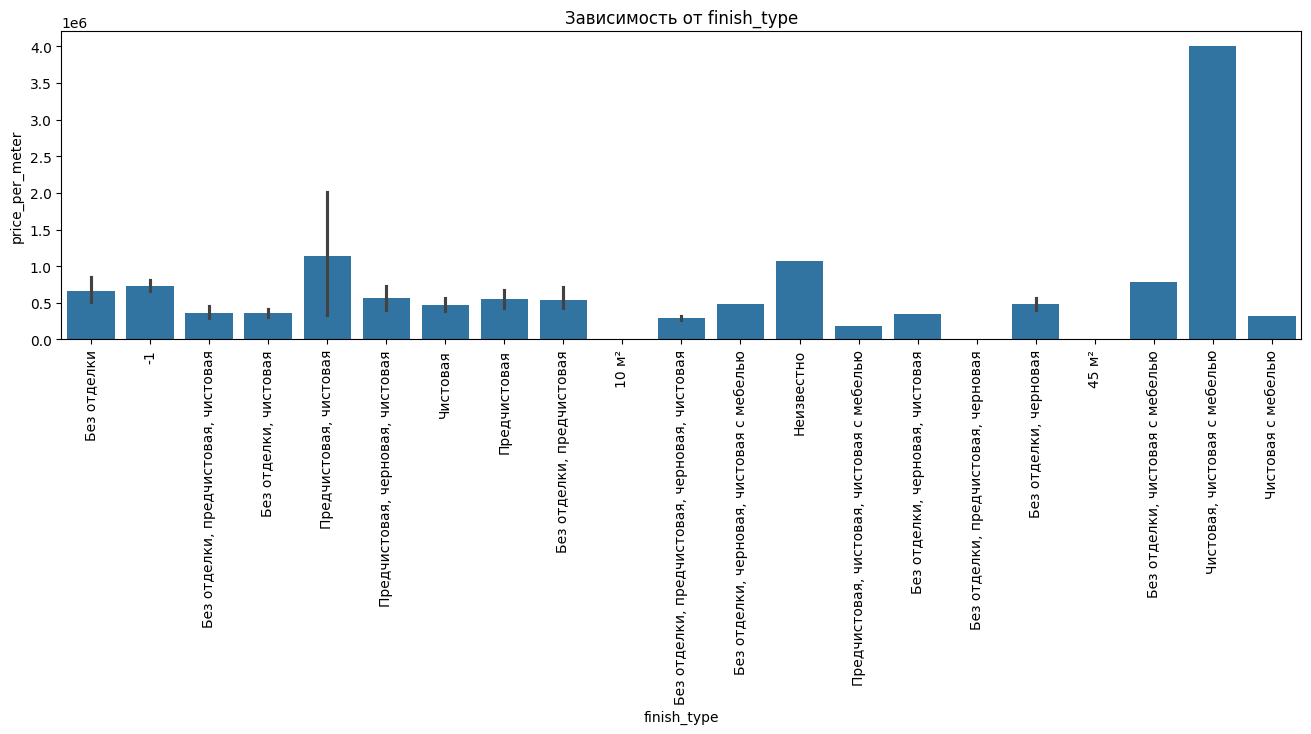

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
columns_to_plot = ['author_type', 'rooms_count', 'underground', 'house_material_type', 'finish_type']
for column in columns_to_plot:
    plt.figure(figsize=(16, 4))
    sns.barplot(data=table, x=column, y='price_per_meter')
    plt.title(f'Зависимость от {column}')
    plt.xlabel(column)
    plt.xticks(rotation=90)
    plt.ylabel('price_per_meter')

    plt.show()

## Зависимость цены квадратного метра в зависимости от параметров

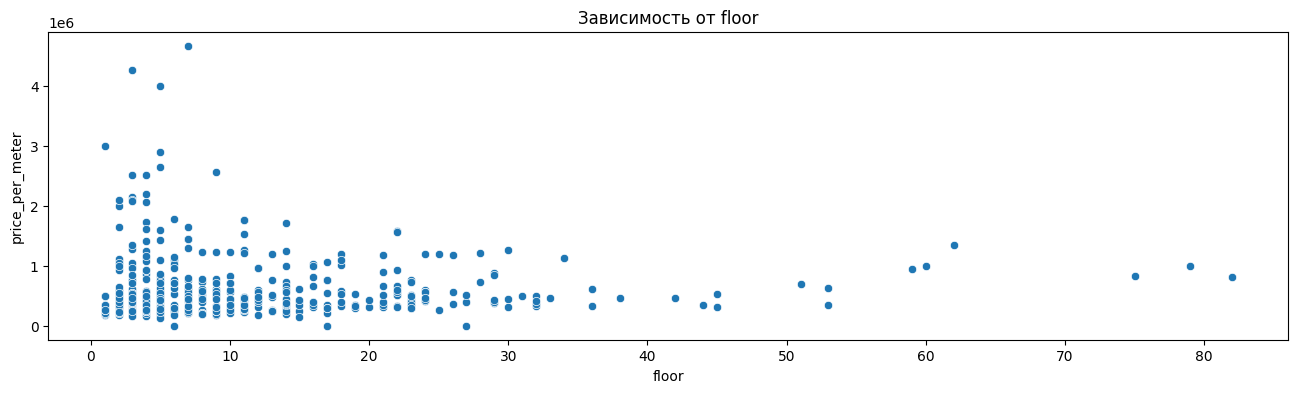

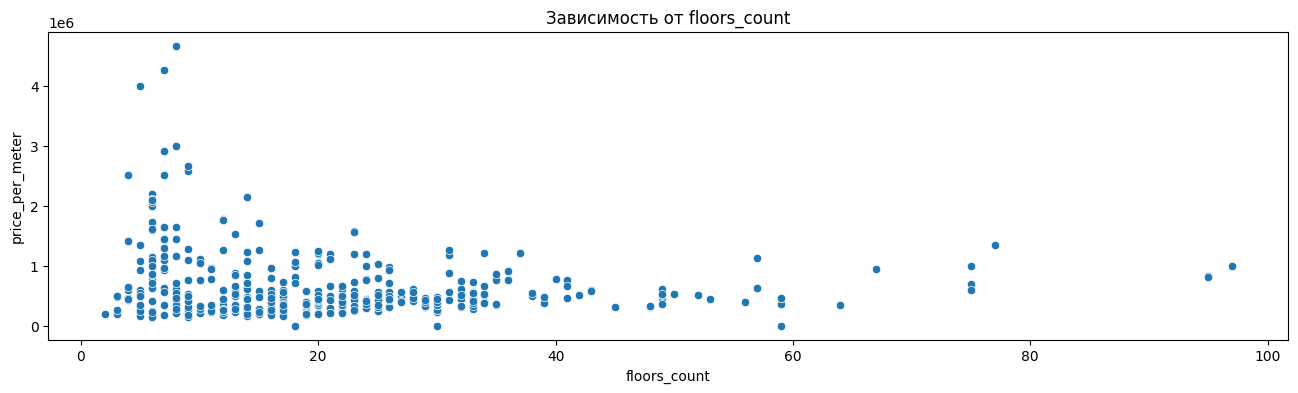

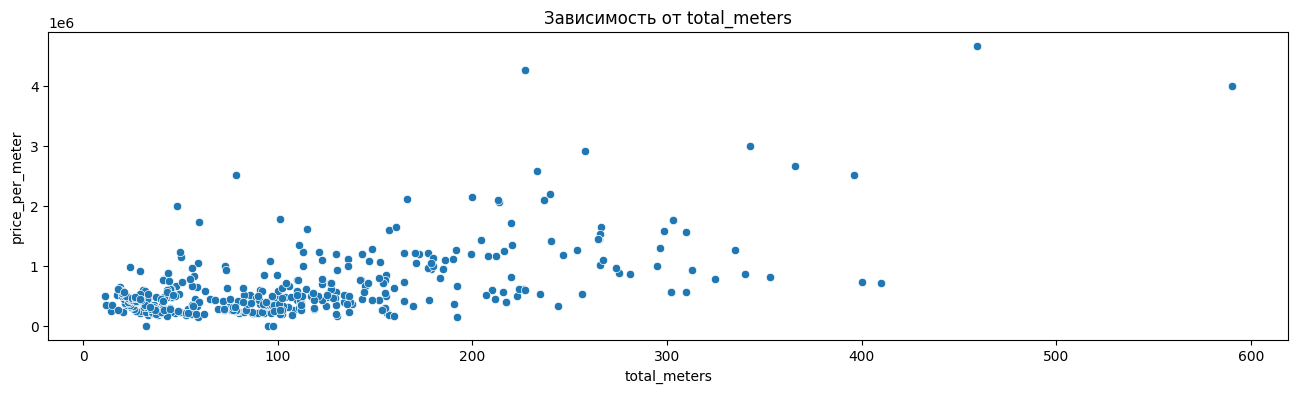

In [124]:
columns_to_plot = ['floor','floors_count','total_meters']
for column in columns_to_plot:
    plt.figure(figsize=(16, 4))
    sns.scatterplot(data=table, x=column, y='price_per_meter')
    plt.title(f'Зависимость от {column}')
    plt.xlabel(column)
    plt.ylabel('price_per_meter')
    plt.show()

## Зависимость цены квадратного метра в зависимости от географического расположения

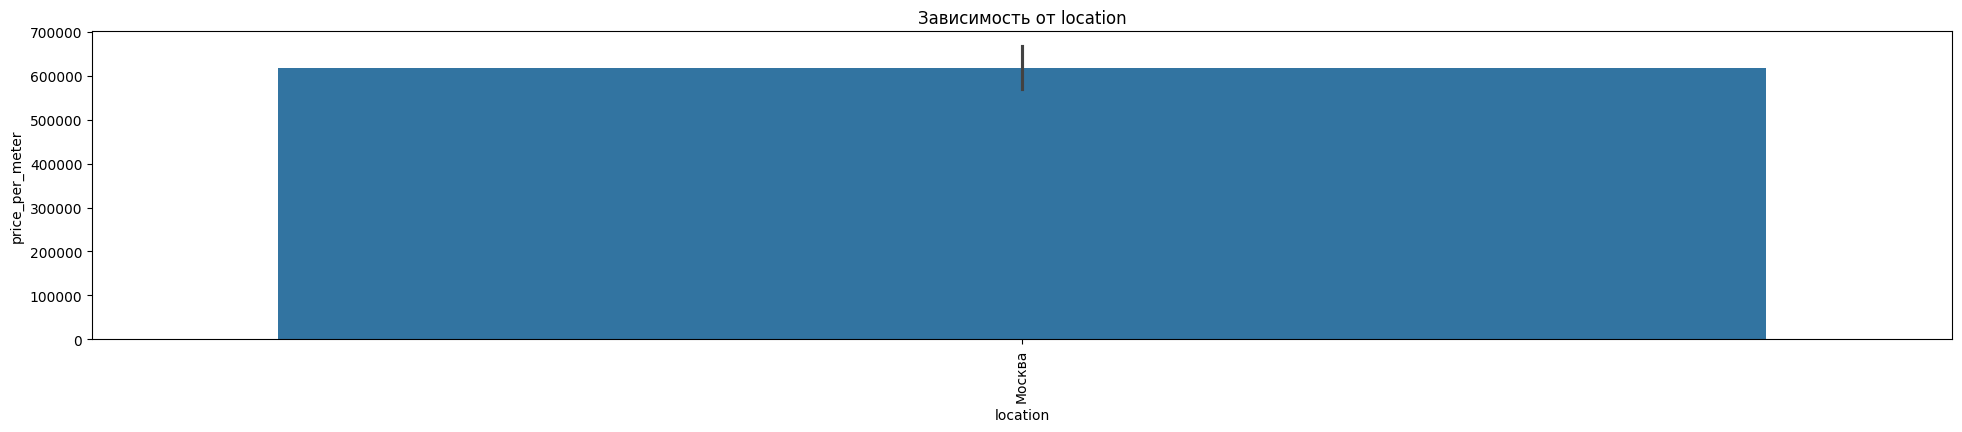

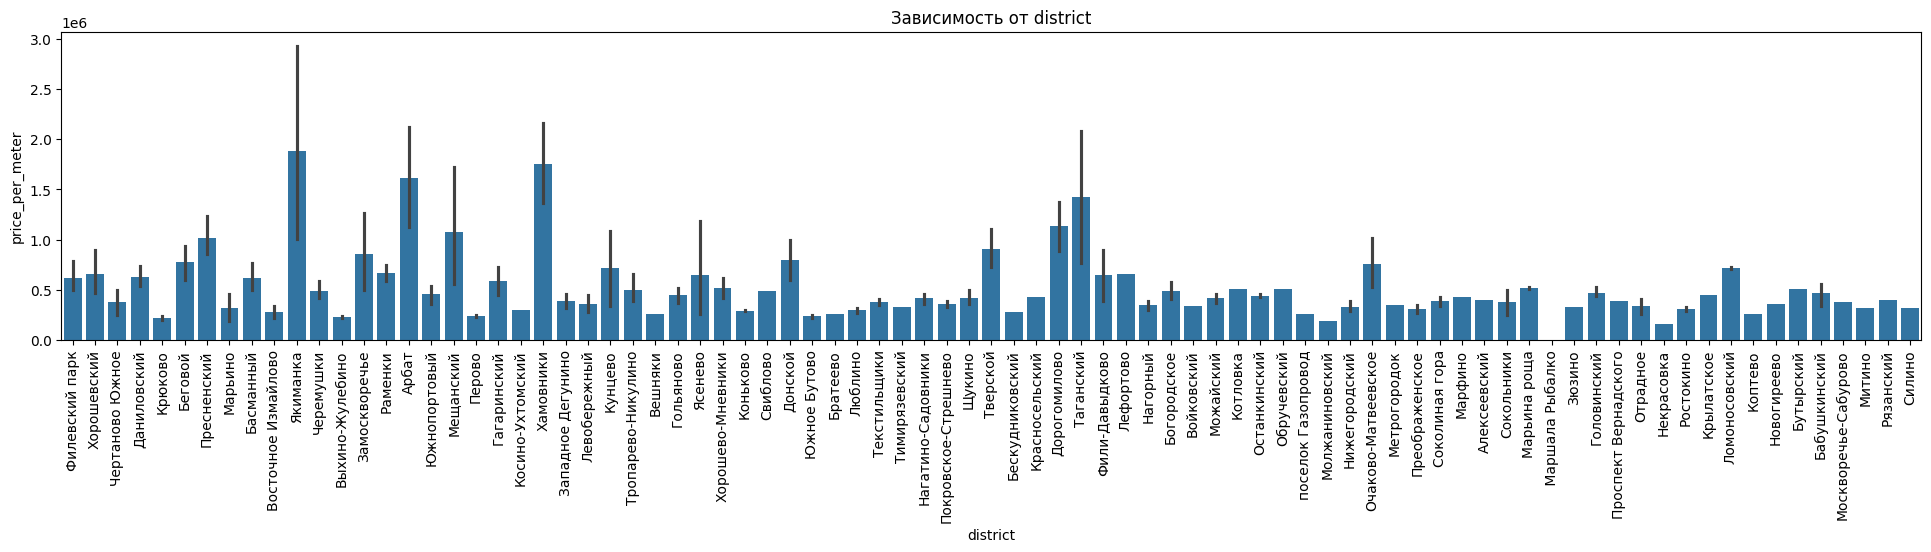

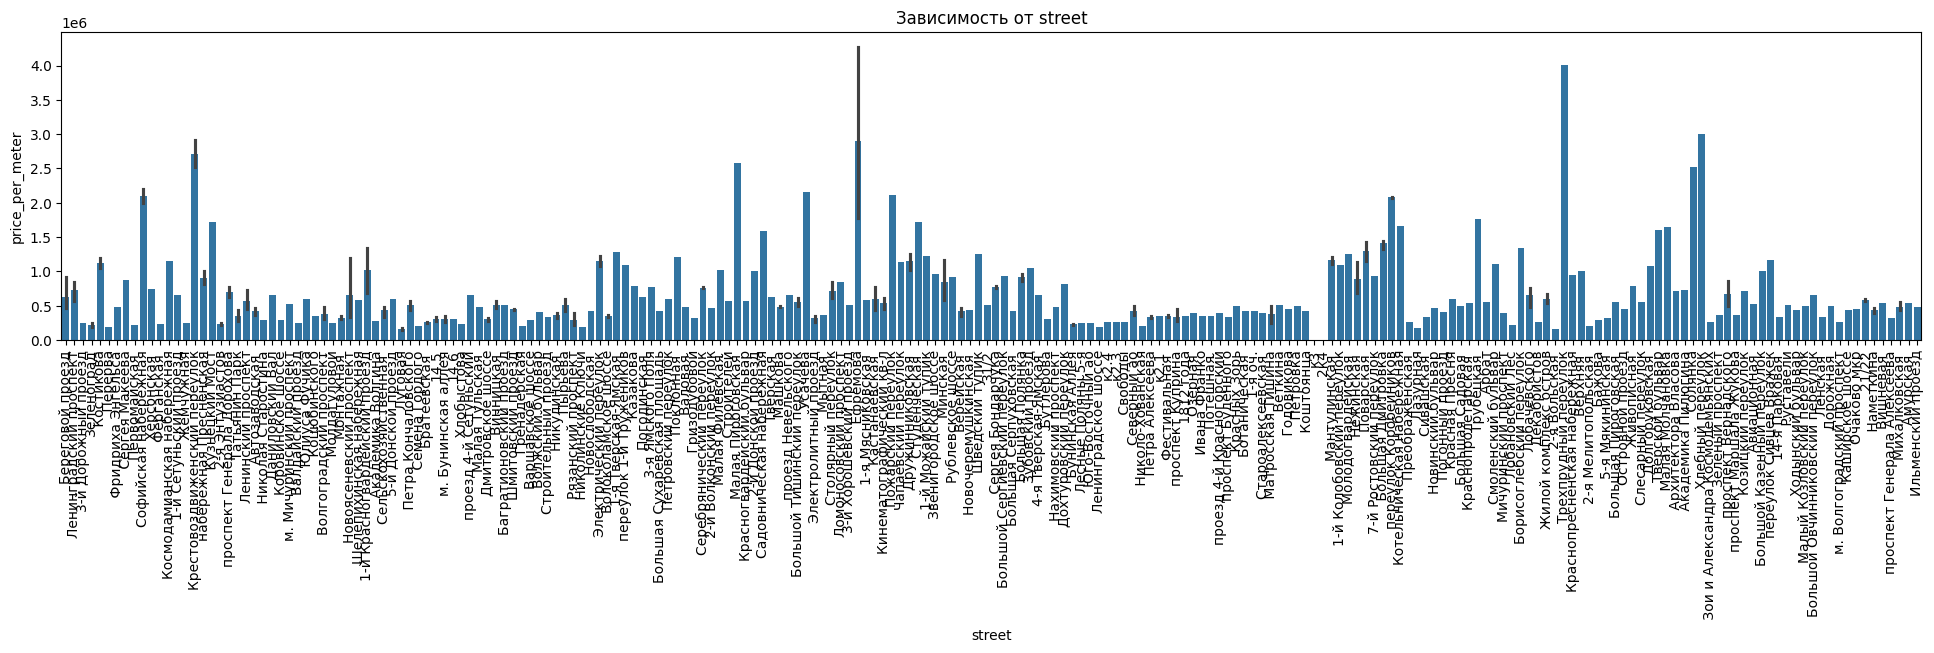

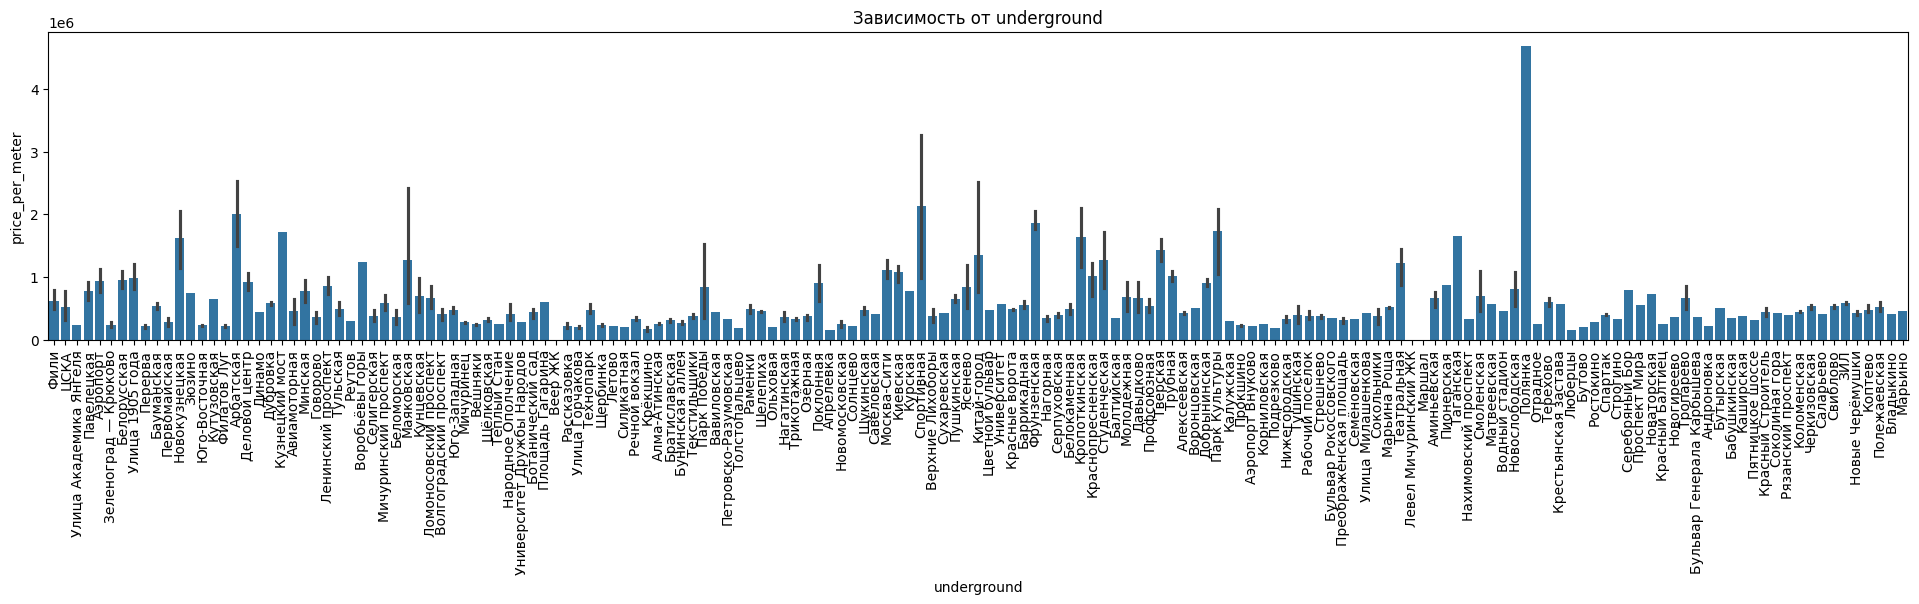

In [121]:
columns_to_plot = ['location', 'district', 'street', 'underground']
for column in columns_to_plot:
    plt.figure(figsize=(24, 4))
    sns.barplot(data=table, x=column, y='price_per_meter')
    plt.title(f'Зависимость от {column}')
    plt.xlabel(column)
    plt.xticks(rotation=90)
    plt.ylabel('price_per_meter')
    plt.show()